### Installs for Textract

In [15]:
!pip install --upgrade pip

In [16]:
!pip install "setuptools<58.0.0"

In [17]:
!pip install textract

It will ask to restart session. Click okay then rerun textract install.

In [18]:
!pip install pdfminer.six

Run install twice to fully load

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Scraping a PDF

In [20]:
import textract

In [21]:
aieu = textract.process("/content/drive/MyDrive/BI BA Handbook/Chapter 7/aieu.pdf", method='pdfminer',
    language='eng')
aieu = aieu.decode("utf-8")

In [22]:
aius = textract.process("/content/drive/MyDrive/BI BA Handbook/Chapter 7/aius.pdf", method='pdfminer',
    language='eng')
aius = aius.decode("utf-8")

In [23]:
aican = textract.process("/content/drive/MyDrive/BI BA Handbook/Chapter 7/aican1.pdf",  method='pdfminer',
    language='eng')
aican = aican.decode("utf-8")

In [24]:
aius

' \n\n \n\nBLUEPRINT FOR AN \n\n \n\nAI BILL OF \nRIGHTS \n\n \n\nMAKING AUTOMATED \n \n \nSYSTEMS WORK FOR \nTHE AMERICAN PEOPLE \n\n \n\n \n \n\n \n\nOCTOBER 2022 \n\n\x0cAbout this Document \nThe  Blueprint  for  an  AI  Bill  of  Rights:  Making  Automated  Systems  Work  for  the  American  People  was \npublished by the White House Office of Science and Technology Policy in October 2022. This framework was \nreleased one year after OSTP announced the launch of a process to develop “a bill of rights for an AI-powered \nworld.”  Its  release  follows  a  year  of  public  engagement  to  inform  this  initiative.  The  framework  is  available \nonline at: https://www.whitehouse.gov/ostp/ai-bill-of-rights \n\n \n\n \n\nAbout the Office of Science and Technology Policy \nThe Office of Science and Technology Policy (OSTP) was established by the National Science and Technology \n \nPolicy, Organization, and Priorities Act of 1976 to provide the President and others within the Executiv

## Preprocessing Pipeline

In [25]:
import re

In [26]:
def clean_text(text):
    text = re.sub('\xa0', ' ', text)
    text = re.sub('\n•', ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\ue080', ' ', text)
    text = re.sub('\x0c', ' ', text)
    html = re.compile('[<,#*?>]')
    text = html.sub(r' ',text)
    url = re.compile('https?://\S+|www\.S+')
    text = url.sub(r' ',text)
    email = re.compile('[A-Za-z0-2]+@[\w]+.[\w]+')
    text = email.sub(r' ',text)
    return text

In [27]:
aican = clean_text(aican)

In [28]:
aican

'Guide on the use of Generative AI - Canada.ca     Canada.ca     About government     Government in a digital age     Digital government innovation     Responsible use of artificial intelligence (AI)  Guide on the use of Generative AI  Table of contents   Overview  What is generative AI   Challenges and concerns  Recommended approach  Policy considerations and best practices  Use of this guide and additional support available  Frequently asked questions  Overview Generative artificial intelligence (AI) tools offer many potential benefits to Government of Canada (GC) institutions. Federal institutions should explore potential uses of generative AI tools for supporting and improving their operations. However  because these tools are evolving  they should not be used in all cases. Federal institutions must be cautious and evaluate the risks before they start using them. The use of these tools should be restricted to instances where risks can be effectively managed.  1 of 27  10/31/2023  9

In [29]:
aius = clean_text(aius)

In [30]:
aieu = clean_text(aieu)

In [31]:
aican

'Guide on the use of Generative AI - Canada.ca     Canada.ca     About government     Government in a digital age     Digital government innovation     Responsible use of artificial intelligence (AI)  Guide on the use of Generative AI  Table of contents   Overview  What is generative AI   Challenges and concerns  Recommended approach  Policy considerations and best practices  Use of this guide and additional support available  Frequently asked questions  Overview Generative artificial intelligence (AI) tools offer many potential benefits to Government of Canada (GC) institutions. Federal institutions should explore potential uses of generative AI tools for supporting and improving their operations. However  because these tools are evolving  they should not be used in all cases. Federal institutions must be cautious and evaluate the risks before they start using them. The use of these tools should be restricted to instances where risks can be effectively managed.  1 of 27  10/31/2023  9

## Processing Pipeline for Word Tokenization

In [37]:
!pip install svgling

In [38]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
import svgling
import string

In [39]:
nltk.download('stopwords')
nltk.download("punkt")
nltk.download("punkt_tab")
nltk.download("wordnet")
nltk.download('averaged_perceptron_tagger_eng')
nltk.download("maxent_ne_chunker_tab")
nltk.download("words")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [40]:
def token_creator(clean_text):

    tokens = word_tokenize(clean_text)

    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]

    stemmer = SnowballStemmer('english')
    lemmatizer = WordNetLemmatizer()

    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    cleaned_tokens = [token for token in lemmatized_tokens
                  if not token.isdigit() and not token in string.punctuation]

    lowercase_tokens = [token.lower() for token in cleaned_tokens]

    pos_tags = pos_tag(lowercase_tokens)

    named_entities = ne_chunk(pos_tags)

    return named_entities, pos_tags, lowercase_tokens, stemmed_tokens

In [46]:
aican_named_entities, aican_pos_tags, aican_lowercase_tokens, aican_stemmed_tokens = token_creator(aican)

In [47]:
aius_named_entities, aius_pos_tags, aius_lowercase_tokens, aius_stemmed_tokens = token_creator(aius)

In [48]:
aieu_named_entities, aieu_pos_tags, aieu_lowercase_tokens, aieu_stemmed_tokens = token_creator(aieu)

In [49]:
aican_stemmed_tokens

['guid',
 'use',
 'generat',
 'ai',
 '-',
 'canada.ca',
 'canada.ca',
 'govern',
 'govern',
 'digit',
 'age',
 'digit',
 'govern',
 'innov',
 'respons',
 'use',
 'artifici',
 'intellig',
 '(',
 'ai',
 ')',
 'guid',
 'use',
 'generat',
 'ai',
 'tabl',
 'content',
 'overview',
 'generat',
 'ai',
 'challeng',
 'concern',
 'recommend',
 'approach',
 'polici',
 'consider',
 'best',
 'practic',
 'use',
 'guid',
 'addit',
 'support',
 'avail',
 'frequent',
 'ask',
 'question',
 'overview',
 'generat',
 'artifici',
 'intellig',
 '(',
 'ai',
 ')',
 'tool',
 'offer',
 'mani',
 'potenti',
 'benefit',
 'govern',
 'canada',
 '(',
 'gc',
 ')',
 'institut',
 '.',
 'feder',
 'institut',
 'explor',
 'potenti',
 'use',
 'generat',
 'ai',
 'tool',
 'support',
 'improv',
 'oper',
 '.',
 'howev',
 'tool',
 'evolv',
 'use',
 'case',
 '.',
 'feder',
 'institut',
 'must',
 'cautious',
 'evalu',
 'risk',
 'start',
 'use',
 '.',
 'use',
 'tool',
 'restrict',
 'instanc',
 'risk',
 'effect',
 'manag',
 '.',
 '1',

In [50]:
aican_lowercase_tokens

['guide',
 'use',
 'generative',
 'ai',
 'canada.ca',
 'canada.ca',
 'government',
 'government',
 'digital',
 'age',
 'digital',
 'government',
 'innovation',
 'responsible',
 'use',
 'artificial',
 'intelligence',
 'ai',
 'guide',
 'use',
 'generative',
 'ai',
 'table',
 'content',
 'overview',
 'generative',
 'ai',
 'challenges',
 'concern',
 'recommended',
 'approach',
 'policy',
 'consideration',
 'best',
 'practice',
 'use',
 'guide',
 'additional',
 'support',
 'available',
 'frequently',
 'asked',
 'question',
 'overview',
 'generative',
 'artificial',
 'intelligence',
 'ai',
 'tool',
 'offer',
 'many',
 'potential',
 'benefit',
 'government',
 'canada',
 'gc',
 'institution',
 'federal',
 'institution',
 'explore',
 'potential',
 'us',
 'generative',
 'ai',
 'tool',
 'supporting',
 'improving',
 'operation',
 'however',
 'tool',
 'evolving',
 'used',
 'case',
 'federal',
 'institution',
 'must',
 'cautious',
 'evaluate',
 'risk',
 'start',
 'using',
 'use',
 'tool',
 'restrict

In [51]:
aican_pos_tags

[('guide', 'NN'),
 ('use', 'NN'),
 ('generative', 'JJ'),
 ('ai', 'NN'),
 ('canada.ca', 'NN'),
 ('canada.ca', 'JJ'),
 ('government', 'NN'),
 ('government', 'NN'),
 ('digital', 'JJ'),
 ('age', 'NN'),
 ('digital', 'JJ'),
 ('government', 'NN'),
 ('innovation', 'NN'),
 ('responsible', 'JJ'),
 ('use', 'NN'),
 ('artificial', 'JJ'),
 ('intelligence', 'NN'),
 ('ai', 'NNS'),
 ('guide', 'VBP'),
 ('use', 'RB'),
 ('generative', 'JJ'),
 ('ai', 'NN'),
 ('table', 'NN'),
 ('content', 'NN'),
 ('overview', 'NN'),
 ('generative', 'JJ'),
 ('ai', 'NN'),
 ('challenges', 'NNS'),
 ('concern', 'NN'),
 ('recommended', 'VBN'),
 ('approach', 'NN'),
 ('policy', 'NN'),
 ('consideration', 'NN'),
 ('best', 'JJS'),
 ('practice', 'NN'),
 ('use', 'NN'),
 ('guide', 'VBP'),
 ('additional', 'JJ'),
 ('support', 'NN'),
 ('available', 'JJ'),
 ('frequently', 'RB'),
 ('asked', 'VBN'),
 ('question', 'NN'),
 ('overview', 'NN'),
 ('generative', 'JJ'),
 ('artificial', 'JJ'),
 ('intelligence', 'NN'),
 ('ai', 'JJ'),
 ('tool', 'NN'),
 

## Sentence Tokenization

In [52]:
from nltk.tokenize import sent_tokenize


In [53]:
def token_sent_creator(clean_text):

    sentences = sent_tokenize(clean_text)
    sentences = [sent.lower().replace(".", "") for sent in sentences]
    return sentences

In [54]:
aican_sentence = token_sent_creator(aican)


In [55]:
aius_sentence = token_sent_creator(aius)

In [56]:
aieu_sentence = token_sent_creator(aieu)

In [57]:
aican_sentence

['guide on the use of generative ai - canadaca     canadaca     about government     government in a digital age     digital government innovation     responsible use of artificial intelligence (ai)  guide on the use of generative ai  table of contents   overview  what is generative ai   challenges and concerns  recommended approach  policy considerations and best practices  use of this guide and additional support available  frequently asked questions  overview generative artificial intelligence (ai) tools offer many potential benefits to government of canada (gc) institutions',
 'federal institutions should explore potential uses of generative ai tools for supporting and improving their operations',
 'however  because these tools are evolving  they should not be used in all cases',
 'federal institutions must be cautious and evaluate the risks before they start using them',
 'the use of these tools should be restricted to instances where risks can be effectively managed',
 '1 of 27  

## Word Count

In [58]:
import pandas as pd
from nltk.probability import FreqDist

In [59]:
wc = FreqDist(aican_lowercase_tokens)

In [60]:
wc

FreqDist({'ai': 187, 'generative': 150, 'use': 106, 'tool': 87, 'information': 56, 'institution': 54, '``': 54, 'federal': 48, 'data': 45, 'content': 43, ...})

In [61]:
df_wc = pd.DataFrame(wc.items(), columns=["word", "freq"])

In [62]:
df_wc.sort_values(by=["freq"], ascending=False)

,word,freq
3,ai,187
2,generative,150
1,use,106
29,tool,87
98,information,56
...,...,...
1135,poverty,1
1134,eradicate,1
1133,effort,1
1132,strengthening,1


In [63]:
def token_with_stop(clean_text):

    tokens = word_tokenize(clean_text)

    stop_words = ["ai", "generative", "use", "using", "``", "’", "10/31/2023", "canada.ca", "pm", "9:45", "may", "also", "could"] + list(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]

    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    cleaned_tokens = [token for token in lemmatized_tokens
                  if not token.isdigit() and not token in string.punctuation]

    lowercase_tokens = [token.lower() for token in cleaned_tokens]

    return lowercase_tokens

In [64]:
aican_lowercase_tokens = token_with_stop(aican)

In [65]:
wc = FreqDist(aican_lowercase_tokens)

In [66]:
df_wc = pd.DataFrame(wc.items(), columns=["word", "freq"])

In [67]:
top_wc = df_wc[df_wc.freq > 20].sort_values(by=["freq"], ascending=False)
top_wc

,word,freq
25,tool,87
89,information,56
32,institution,54
33,federal,48
172,data,45
9,content,43
359,system,38
0,guide,37
84,privacy,29
190,output,28


In [68]:
import matplotlib.pyplot as plt

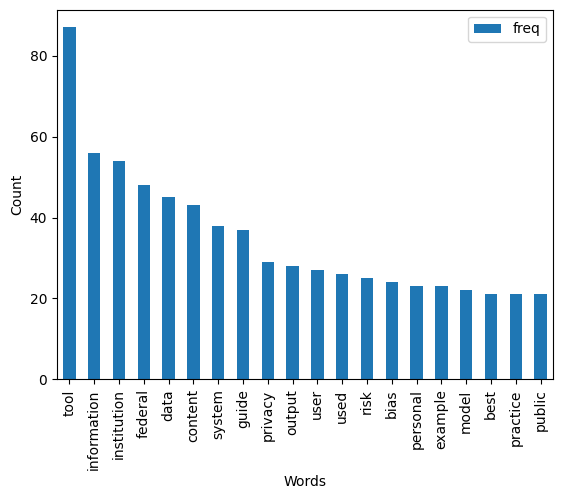

In [69]:
top_wc.plot(x="word", kind='bar')
plt.xlabel('Words')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

## Word Cloud

In [70]:
!pip install wordcloud

In [71]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

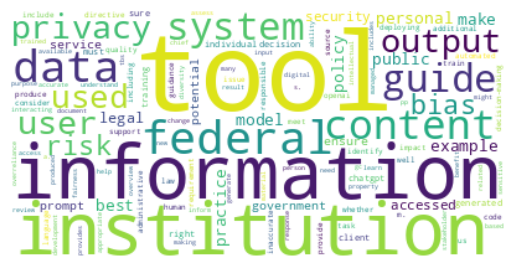

In [72]:
wordcloud = WordCloud(background_color="white")
wordcloud.generate_from_frequencies(dict(wc))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
aieu

In [73]:
aieu_lowercase_tokens = token_with_stop(aieu)

In [74]:
wcEU = FreqDist(aieu_lowercase_tokens)

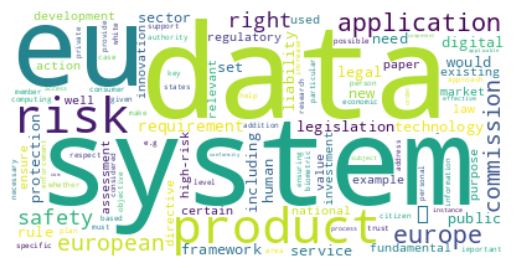

In [75]:
wordcloud = WordCloud(background_color="white")
wordcloud.generate_from_frequencies(dict(wcEU))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [76]:
aius

'      BLUEPRINT FOR AN      AI BILL OF  RIGHTS      MAKING AUTOMATED      SYSTEMS WORK FOR  THE AMERICAN PEOPLE              OCTOBER 2022    About this Document  The  Blueprint  for  an  AI  Bill  of  Rights:  Making  Automated  Systems  Work  for  the  American  People  was  published by the White House Office of Science and Technology Policy in October 2022. This framework was  released one year after OSTP announced the launch of a process to develop “a bill of rights for an AI-powered  world.”  Its  release  follows  a  year  of  public  engagement  to  inform  this  initiative.  The  framework  is  available  online at:           About the Office of Science and Technology Policy  The Office of Science and Technology Policy (OSTP) was established by the National Science and Technology    Policy  Organization  and Priorities Act of 1976 to provide the President and others within the Executive Office  of the President with advice on the scientific  engineering  and technological aspe

In [77]:
aius_lowercase_tokens = token_with_stop(aius)

In [78]:
wcUS = FreqDist(aius_lowercase_tokens)

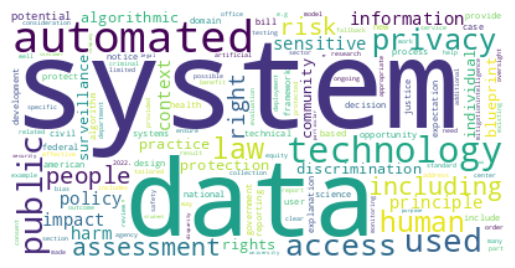

In [79]:
wordcloud = WordCloud(background_color="white")
wordcloud.generate_from_frequencies(dict(wcUS))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [80]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [81]:
can_coloring = np.array(Image.open("/content/drive/MyDrive/BI BA Handbook/Chapter 7/canadaimage.jpeg"))

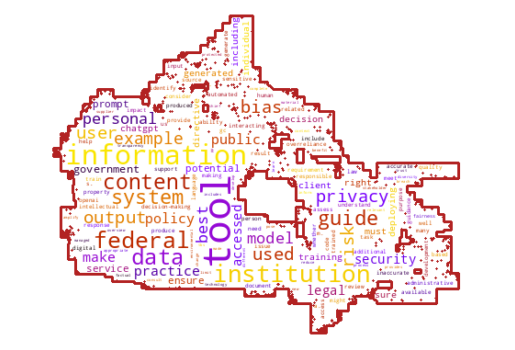

In [82]:
wordcloud = WordCloud(background_color="white", mask=can_coloring, contour_width=3, colormap = "gnuplot", contour_color='firebrick')
wordcloud.generate_from_frequencies(dict(wc))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Survey Reponses

In [83]:
df = pd.read_excel('/content/drive/MyDrive/BI BA Handbook/Chapter 4/bargainclean.xlsx')

In [84]:
df.head()

,Respondent,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8a,Q8b,...,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24
0,1,Increasing pay,Full Time,3.0,Additional funding for Counselling,No,1,No,1,3,...,4,NaN,0.0,4,Better lighting in the parking lot,4,More women in leadership positions,Yes,East,15.0
1,2,Improve benefits,Full Time,1.0,Drug coverage,Yes,3,Yes,3,4,...,2,Be able to work from home once a week,0.0,3,NaN,4,NaN,No,North,2.0
2,3,Job security,Part Time,NaN,NaN,No,1,No,3,1,...,3,Give me more hours,0.0,3,NaN,5,NaN,No,North,NaN
3,4,Job security,Part Time,NaN,NaN,I don't know,4,No,3,2,...,2,more flexibility on work from home for part time,0.0,4,NaN,4,NaN,Yes,East,1.0
4,5,Improve working conditions,Full Time,3.0,Wellness account,Yes,3,No,2,3,...,2,More control over how I do my work and where,0.0,2,Visible minorities are not given same project ...,2,Visible minorities are not given same project ...,Prefer not to answer,South,6.0


In [85]:
df['Q16'] = df['Q16'].astype(str)

In [86]:
text = " ".join(answer for answer in df["Q16"])

In [87]:
text

"nan Be able to work from home once a week Give me more hours more flexibility on work from home for part time More control over how I do my work and where More guaranteed hours each week Closer parking Provide childcare on site provide childcare or provide more flexibility as to when I work so that I can work around childcare not all areas of the campus are wheelchair accessible provide bonus pay to those working the night shift provide childcare provide up to date technology so that I can do my job. My computer is ten years old and very slow. more opportunities for overtime Greater flexibility in work hours. Able to work a 4 day work week. More mentoring opportunities incentive pay for those who have to come in earlier than others ability to work 4 day work week leadership training opportunities, able to work at campus closer to where I live My boss is an ass who makes us all come in an hour before other departments. When I asked to transfer locations, my request was denied. give me 

In [88]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [89]:
stop_words = ["nan"] + list(STOPWORDS)

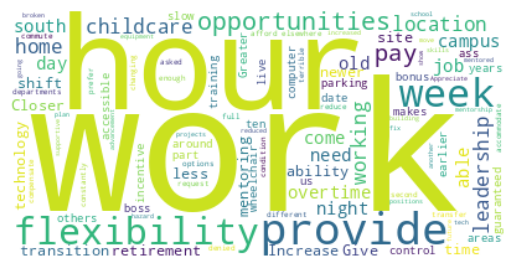

In [90]:
wordcloud = WordCloud(stopwords=stop_words, colormap="viridis", background_color="white")
wordcloud.generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [91]:
stop_words = ["nan", "work"] + list(STOPWORDS)

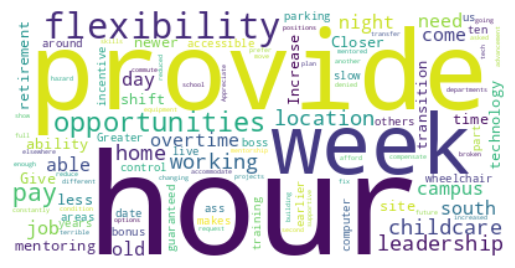

In [92]:
wordcloud = WordCloud(stopwords=stop_words, background_color="white")
wordcloud.generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [93]:
df['Q16'] = df['Q16'].astype(str)

In [94]:
df1 = df[df["Q2"] == "Part Time"]

In [95]:
df2 = df[df["Q2"] == "Full Time"]

In [96]:
text1 = " ".join(answer for answer in df1["Q16"])

In [97]:
text2 = " ".join(answer for answer in df2["Q16"])

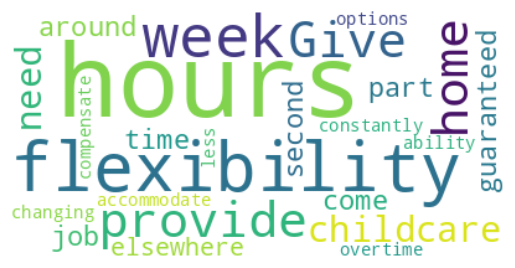

In [98]:
wordcloud = WordCloud(stopwords=stop_words, background_color="white")
wordcloud.generate(text1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

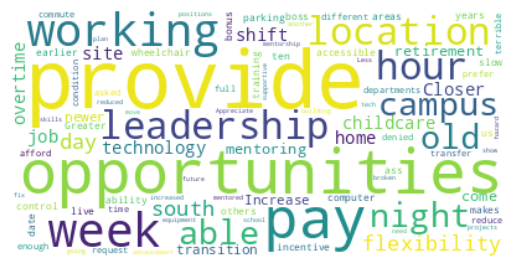

In [99]:
wordcloud = WordCloud(stopwords=stop_words, background_color="white")
wordcloud.generate(text2)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Count Vectorizer

In [100]:
aican = textract.process("/content/drive/MyDrive/BI BA Handbook/Chapter 7/aican1.pdf")
aican = aican.decode("utf-8")

In [101]:
aican

'Guide on the use of Generative AI - Canada.ca\n\nhttps://www.canada.ca/en/government/system/digital-government/digita...\n\nCanada.ca\n\n\ue080\n\nAbout\xa0government\n\n\ue080\n\nGovernment\xa0in\xa0a\xa0digital\xa0age\n\n\ue080\n\nDigital\xa0government\xa0innovation\n\n\ue080\n\nResponsible\xa0use\xa0of\xa0artificial\xa0intelligence\xa0(AI)\n\nGuide on the use of Generative AI\n\nTable of contents\n\n• Overview\n• What\xa0is\xa0generative\xa0AI?\n• Challenges\xa0and\xa0concerns\n• Recommended\xa0approach\n• Policy\xa0considerations\xa0and\xa0best\xa0practices\n• Use\xa0of\xa0this\xa0guide\xa0and\xa0additional\xa0support\xa0available\n• Frequently\xa0asked\xa0questions\n\nOverview\nGenerative\xa0artificial\xa0intelligence\xa0(AI)\xa0tools\xa0offer\xa0many\xa0potential\xa0benefits\xa0to\nGovernment\xa0of\xa0Canada\xa0(GC)\xa0institutions.\xa0Federal\xa0institutions\xa0should\nexplore\xa0potential\xa0uses\xa0of\xa0generative\xa0AI\xa0tools\xa0for\xa0supporting\xa0and\nimproving\xa0thei

In [102]:
aican = clean_text(aican)

In [103]:
aican

'Guide on the use of Generative AI - Canada.ca     Canada.ca     About government     Government in a digital age     Digital government innovation     Responsible use of artificial intelligence (AI)  Guide on the use of Generative AI  Table of contents   Overview  What is generative AI   Challenges and concerns  Recommended approach  Policy considerations and best practices  Use of this guide and additional support available  Frequently asked questions  Overview Generative artificial intelligence (AI) tools offer many potential benefits to Government of Canada (GC) institutions. Federal institutions should explore potential uses of generative AI tools for supporting and improving their operations. However  because these tools are evolving  they should not be used in all cases. Federal institutions must be cautious and evaluate the risks before they start using them. The use of these tools should be restricted to instances where risks can be effectively managed.  1 of 27  10/31/2023  9

In [104]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [105]:
corpus_aican = [aican]

In [106]:
count_vect = CountVectorizer(stop_words='english')
BOW = count_vect.fit_transform(corpus_aican)
count_vect.vocabulary_

{'guide': 489,
 'use': 1101,
 'generative': 473,
 'ai': 71,
 'canada': 177,
 'ca': 172,
 'government': 480,
 'digital': 341,
 'age': 69,
 'innovation': 556,
 'responsible': 923,
 'artificial': 105,
 'intelligence': 569,
 'table': 1031,
 'contents': 261,
 'overview': 752,
 'challenges': 192,
 'concerns': 239,
 'recommended': 881,
 'approach': 96,
 'policy': 785,
 'considerations': 247,
 'best': 150,
 'practices': 800,
 'additional': 62,
 'support': 1021,
 'available': 135,
 'frequently': 457,
 'asked': 108,
 'questions': 865,
 'tools': 1059,
 'offer': 719,
 'potential': 795,
 'benefits': 149,
 'gc': 465,
 'institutions': 563,
 'federal': 443,
 'explore': 428,
 'uses': 1105,
 'supporting': 1022,
 'improving': 528,
 'operations': 734,
 'evolving': 417,
 'used': 1102,
 'cases': 184,
 'cautious': 187,
 'evaluate': 411,
 'risks': 939,
 'start': 994,
 'using': 1106,
 'restricted': 926,
 'instances': 560,
 'effectively': 374,
 'managed': 655,
 '27': 26,
 '10': 3,
 '31': 29,
 '2023': 19,
 '45':

In [107]:
sum_words = BOW.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vect.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

In [108]:
words_freq

[('ai', np.int64(189)),
 ('generative', np.int64(150)),
 ('use', np.int64(106)),
 ('tools', np.int64(65)),
 ('2023', np.int64(62)),
 ('information', np.int64(56)),
 ('institutions', np.int64(49)),
 ('federal', np.int64(48)),
 ('data', np.int64(45)),
 ('content', np.int64(42)),
 ('guide', np.int64(37)),
 ('canada', np.int64(32)),
 ('27', np.int64(31)),
 ('10', np.int64(31)),
 ('ca', np.int64(29)),
 ('privacy', np.int64(29)),
 ('31', np.int64(27)),
 ('45', np.int64(27)),
 ('pm', np.int64(27)),
 ('outputs', np.int64(27)),
 ('used', np.int64(26)),
 ('users', np.int64(24)),
 ('personal', np.int64(23)),
 ('public', np.int64(22)),
 ('example', np.int64(22)),
 ('tool', np.int64(22)),
 ('best', np.int64(21)),
 ('practices', np.int64(21)),
 ('risks', np.int64(21)),
 ('using', np.int64(21)),
 ('models', np.int64(20)),
 ('making', np.int64(19)),
 ('policy', np.int64(18)),
 ('legal', np.int64(17)),
 ('security', np.int64(17)),
 ('biases', np.int64(17)),
 ('make', np.int64(17)),
 ('systems', np.int6

In [109]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

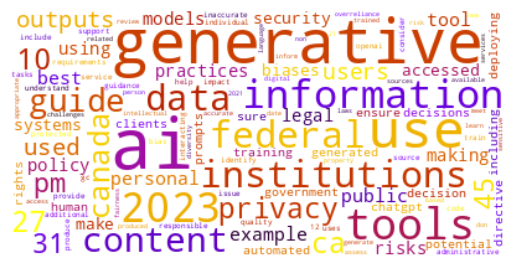

In [110]:
wordcloud = WordCloud(background_color="white", colormap = "gnuplot")
wordcloud.generate_from_frequencies(dict(words_freq))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [111]:
new_stopwords = ["ai", "generative", "use", "27", "45", "10", "2023", "using", "``", "’", "31", "canada.ca", "pm", "9:45", "may", "also", "could"]

In [112]:
words_freq_df = pd.DataFrame(words_freq, columns=["word", "freq"])

In [113]:
words_freq_df.head()

,word,freq
0,ai,189
1,generative,150
2,use,106
3,tools,65
4,2023,62


In [114]:
words_freq_df = words_freq_df[~words_freq_df['word'].isin(new_stopwords)]

In [115]:
words_freq_df.head()

,word,freq
3,tools,65
5,information,56
6,institutions,49
7,federal,48
8,data,45


In [116]:
words_freq_dict = words_freq_df.set_index('word').to_dict()['freq']

In [117]:
words_freq_dict

{'tools': 65,
 'information': 56,
 'institutions': 49,
 'federal': 48,
 'data': 45,
 'content': 42,
 'guide': 37,
 'canada': 32,
 'ca': 29,
 'privacy': 29,
 'outputs': 27,
 'used': 26,
 'users': 24,
 'personal': 23,
 'public': 22,
 'example': 22,
 'tool': 22,
 'best': 21,
 'practices': 21,
 'risks': 21,
 'models': 20,
 'making': 19,
 'policy': 18,
 'legal': 17,
 'security': 17,
 'biases': 17,
 'make': 17,
 'systems': 17,
 'accessed': 17,
 'government': 16,
 'potential': 16,
 'training': 16,
 'ensure': 16,
 'generated': 16,
 'decision': 15,
 'chatgpt': 14,
 'rights': 13,
 'sure': 13,
 'decisions': 13,
 'deploying': 12,
 'including': 12,
 'human': 12,
 'directive': 12,
 'prompts': 12,
 'automated': 11,
 'clients': 11,
 'administrative': 11,
 'consider': 11,
 'service': 10,
 'include': 10,
 'requirements': 10,
 'identify': 10,
 'impact': 10,
 'responsible': 9,
 'additional': 9,
 'support': 9,
 'gc': 9,
 'uses': 9,
 'tasks': 9,
 'code': 9,
 'inaccurate': 9,
 'openai': 9,
 'individual': 9,


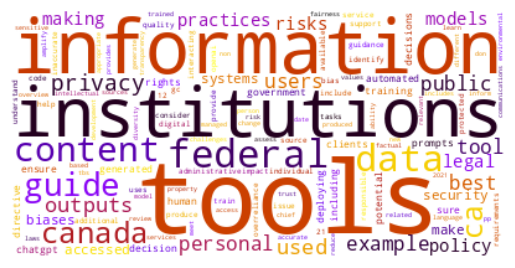

In [118]:
wordcloud = WordCloud(background_color="white", colormap = "gnuplot")
wordcloud.generate_from_frequencies(words_freq_dict)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Ngrams

In [119]:
aican = textract.process("/content/drive/MyDrive/BI BA Handbook/Chapter 7/aican1.pdf")
aican = aican.decode("utf-8")

In [120]:
aican = clean_text(aican)

In [121]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [122]:
corpus_aican = [aican]

In [123]:
top_wf_comb = []

In [124]:
def frequency_table(ngram_min, ngram_max, corpus):
   for i in range (ngram_min, ngram_max+1):
        count_vect = CountVectorizer(ngram_range=(i, i), stop_words='english', max_features=100)
        BOW = count_vect.fit_transform(corpus)
        sum_words = BOW.sum(axis=0)
        words_freq = [(word, sum_words[0, idx]) for word, idx in count_vect.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        words_freq_df = pd.DataFrame(words_freq, columns=["word", "freq"])
        top_wf = words_freq_df[words_freq_df.freq > 10].sort_values(by=["freq"], ascending=False)
        top_wf_comb.append(top_wf)
   return top_wf_comb

In [125]:
top_wf_comb = frequency_table(1, 3, corpus_aican)

In [126]:
top_wf_comb

[              word  freq
 0               ai   189
 1       generative   150
 2              use   106
 3            tools    65
 4             2023    62
 5      information    56
 6     institutions    49
 7          federal    48
 8             data    45
 9          content    42
 10           guide    37
 11          canada    32
 12              27    31
 13              10    31
 14              ca    29
 15         privacy    29
 16              31    27
 17              45    27
 18              pm    27
 19         outputs    27
 20            used    26
 21           users    24
 22        personal    23
 23          public    22
 24         example    22
 25            tool    22
 26            best    21
 27       practices    21
 28           risks    21
 29           using    21
 30          models    20
 31          making    19
 32          policy    18
 33           legal    17
 34        security    17
 35          biases    17
 36            make    17
 37         

In [127]:
new_bigrams = [b for b in top_wf_comb[1]["word"] if all(b not in t for t in top_wf_comb[2]["word"])]

In [129]:
new_bigrams

['federal institutions',
 'personal information',
 'best practices',
 'decision making',
 'training data',
 'accessed 2023',
 '2023 accessed']

In [130]:
top_wf_comb[1] = top_wf_comb[1][top_wf_comb[1]['word'].isin(new_bigrams)]

In [131]:
new_unigrams = [b for b in top_wf_comb[0]["word"] if all(b not in t for t in top_wf_comb[1]["word"])]

In [132]:
top_wf_comb[0] = top_wf_comb[0][top_wf_comb[0]['word'].isin(new_unigrams)]

In [133]:
topwf = pd.concat(top_wf_comb)

In [134]:
topwf[topwf.freq > 10].sort_values(by=["freq"], ascending=False)

,word,freq
1,generative,150
2,use,106
3,tools,65
0,use generative ai,65
9,content,42
...,...,...
57,consider,11
54,automated,11
55,clients,11
20,2023 accessed,11


In [135]:
new_stopwords = ["use", "used", "27", "45", "10", "10 31", "27 10", "2023 45", "31 2023", "45 pm", "2023", "using", "``", "’", "31", "canada.ca", "pm", "9:45", "may", "also", "could"]

In [136]:
words_freq_df = topwf[~topwf['word'].isin(new_stopwords)]

In [137]:
words_freq_dict = words_freq_df.set_index('word').to_dict()['freq']

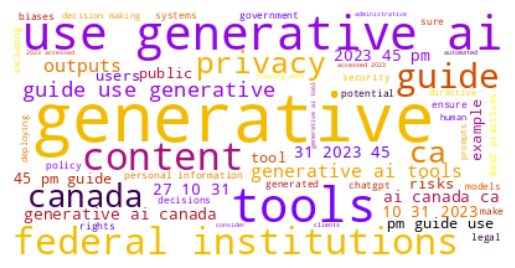

In [138]:
wordcloud = WordCloud(background_color="white", colormap = "gnuplot")
wordcloud.generate_from_frequencies(words_freq_dict)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


## Zipf's Law

In [139]:
aican

'Guide on the use of Generative AI - Canada.ca     Canada.ca     About government     Government in a digital age     Digital government innovation     Responsible use of artificial intelligence (AI)  Guide on the use of Generative AI  Table of contents   Overview  What is generative AI   Challenges and concerns  Recommended approach  Policy considerations and best practices  Use of this guide and additional support available  Frequently asked questions  Overview Generative artificial intelligence (AI) tools offer many potential benefits to Government of Canada (GC) institutions. Federal institutions should explore potential uses of generative AI tools for supporting and improving their operations. However  because these tools are evolving  they should not be used in all cases. Federal institutions must be cautious and evaluate the risks before they start using them. The use of these tools should be restricted to instances where risks can be effectively managed.  1 of 27  10/31/2023  9

In [140]:
import re

In [141]:
def remove_numbers(text):
  text = re.sub("\d.", "", text)
  text = re.sub("[:\/,]", "", text )
  return text

In [142]:
aieu = remove_numbers(aieu)

In [143]:
aican

'Guide on the use of Generative AI - Canada.ca     Canada.ca     About government     Government in a digital age     Digital government innovation     Responsible use of artificial intelligence (AI)  Guide on the use of Generative AI  Table of contents   Overview  What is generative AI   Challenges and concerns  Recommended approach  Policy considerations and best practices  Use of this guide and additional support available  Frequently asked questions  Overview Generative artificial intelligence (AI) tools offer many potential benefits to Government of Canada (GC) institutions. Federal institutions should explore potential uses of generative AI tools for supporting and improving their operations. However  because these tools are evolving  they should not be used in all cases. Federal institutions must be cautious and evaluate the risks before they start using them. The use of these tools should be restricted to instances where risks can be effectively managed.  1 of 27  10/31/2023  9

In [144]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

In [145]:
corpus_aieu = [aieu]

In [156]:
corpus_aican = [aican]

In [157]:
top_wf_comb = []

In [158]:
def frequency_table(ngram_min, ngram_max, corpus):
   for i in range (ngram_min, ngram_max+1):
        count_vect = CountVectorizer(ngram_range=(i, i), stop_words='english', max_features=100)
        BOW = count_vect.fit_transform(corpus)
        sum_words = BOW.sum(axis=0)
        words_freq = [(word, sum_words[0, idx]) for word, idx in count_vect.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        words_freq_df = pd.DataFrame(words_freq, columns=["word", "freq"])
        top_wf = words_freq_df[words_freq_df.freq > 10].sort_values(by=["freq"], ascending=False)
        top_wf_comb.append(top_wf)
   return top_wf_comb

In [148]:
top_wf_comb = frequency_table(1, 2, corpus_aieu)

In [149]:
top_wf_comb[1]

,word,freq
0,ai systems,51
1,ai applications,31
2,high risk,28
3,use ai,27
4,fundamental rights,24
5,white paper,20
6,regulatory framework,19
7,member states,17
8,products services,17
9,personal data,16


In [161]:
new_bigrams = [b for b in top_wf_comb[1]["word"] if all(b not in t for t in top_wf_comb[2]["word"])]
top_wf_comb[1] = top_wf_comb[1][top_wf_comb[1]["word"].isin(new_bigrams)]

IndexError: list index out of range

In [162]:
new_unigrams = [b for b in top_wf_comb[0]["word"] if all(b not in t for t in top_wf_comb[1]["word"])]
top_wf_comb[0] = top_wf_comb[0][top_wf_comb[0]["word"].isin(new_unigrams)]

In [163]:
topwf = pd.concat(top_wf_comb)

In [153]:
topwf_aieu = topwf.sort_values(by=["freq"], ascending=False)

In [154]:
topwf_aieu.head()

,word,freq
2,eu,96
4,europe,64
5,risks,55
7,requirements,51
0,ai systems,51


In [159]:
top_wf_comb = frequency_table(1, 2, corpus_aican)

In [160]:
top_wf_comb[1]

,word,freq
0,generative ai,143
1,use generative,65
2,federal institutions,42
3,ai tools,32
4,guide use,28
5,canada ca,28
6,ai canada,27
7,27 10,27
8,10 31,27
9,31 2023,27


In [164]:
topwf_aican = topwf.sort_values(by=["freq"], ascending=False)

In [165]:
topwf_aican.head()

,word,freq
0,generative ai,143
1,use generative,65
2,federal institutions,42
9,content,42
3,ai tools,32


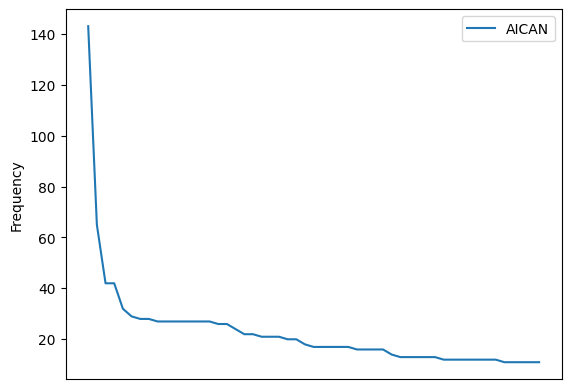

In [166]:
plt.plot(topwf_aican["word"], topwf_aican["freq"])
plt.legend(["AICAN"])
plt.xticks([])
plt.ylabel("Frequency")
plt.show()

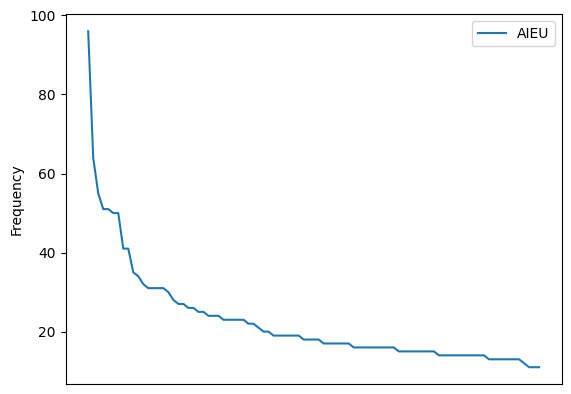

In [167]:
plt.plot(topwf_aieu["word"], topwf_aieu["freq"])
plt.legend(["AIEU"])
plt.xticks([])
plt.ylabel("Frequency")
plt.show()

In [168]:
topwf_aieu = topwf_aieu.reset_index(drop=True)

In [169]:
def smoothify(yInput, topwordlist):
    x = np.array(range(0,len(topwordlist.index)))
    y = np.array(yInput)
    x_smooth = np.linspace(x.min(), x.max(), 600)
    spl = make_interp_spline(x, y, k=3)
    y_smooth = spl(x_smooth)
    return x_smooth, y_smooth

In [170]:
ziffianCurveValues = [100/i for i in range(1, len(topwf_aieu.index)+1)]

In [171]:
x, y = smoothify(ziffianCurveValues, topwf_aieu)

In [172]:
freq_per = topwf_aieu["freq"]/topwf_aieu["freq"][0]*100

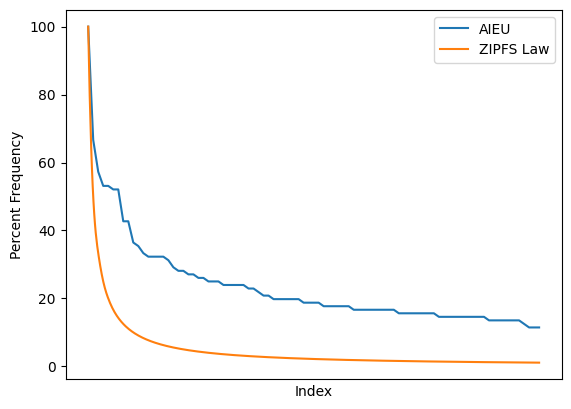

In [173]:
plt.plot(topwf_aieu.index, freq_per)
plt.plot(x,y)
plt.legend(["AIEU", "ZIPFS Law"])
plt.xticks([])
plt.ylabel("Percent Frequency")
plt.xlabel("Index")
plt.show()

PRACTICE

Plot Zipfs law for AIUS and AICAN. Compare to AIEU.

## Word Search

In [175]:
aican_sentence

['guide on the use of generative ai - canadaca     canadaca     about government     government in a digital age     digital government innovation     responsible use of artificial intelligence (ai)  guide on the use of generative ai  table of contents   overview  what is generative ai   challenges and concerns  recommended approach  policy considerations and best practices  use of this guide and additional support available  frequently asked questions  overview generative artificial intelligence (ai) tools offer many potential benefits to government of canada (gc) institutions',
 'federal institutions should explore potential uses of generative ai tools for supporting and improving their operations',
 'however  because these tools are evolving  they should not be used in all cases',
 'federal institutions must be cautious and evaluate the risks before they start using them',
 'the use of these tools should be restricted to instances where risks can be effectively managed',
 '1 of 27  

In [176]:
def hasKeyword(sentence, keyword):

  context = []

  for sent in sentence:
    if keyword in sent:
      context.append(sent)

  return context

In [177]:
safety = hasKeyword(aican_sentence, "safety")

In [178]:
safety

[]

In [179]:
fed_ai = hasKeyword(aican_sentence, "generative ai by federal institutions")

In [180]:
fed_ai

['all personal information used by  created or obtained through  and disclosed for the use of generative ai by federal institutions is subject to the requirements of the privacy act and related policy instruments']

In [181]:
df = pd.read_excel('/content/drive/MyDrive/BI BA Handbook/Chapter 4/bargainclean.xlsx')

In [182]:
df['Q16'] = df['Q16'].astype(str)

In [183]:
flexibility = hasKeyword(df["Q16"], "flexibility")

In [184]:
flexibility

['more flexibility on work from home for part time',
 'provide childcare or provide more flexibility as to when I work so that I can work around childcare',
 'Greater flexibility in work hours. Able to work a 4 day work week.',
 "give me more hours and flexibility as to when I need to come in. I can't get a second job elsewhere because the hours are constantly changing.",
 'more flexibility, weeks with less hours to accommodate my other work but then overtime options on other weeks to compensate',
 'Increase pay for working night shift. Appreciate the flexibility to work nights while going to school during the day.',
 'increased flexibility for working from home or working reduced work weeks']

In [185]:
df1 = df[df["Q2"] == "Part Time"]

In [186]:
df2 = df[df["Q2"] == "Full Time"]

In [187]:
flexibility_PT = hasKeyword(df1["Q16"], "flexibility")

In [188]:
flexibility_FT = hasKeyword(df2["Q16"], "flexibility")

In [189]:
flexibility_PT

['more flexibility on work from home for part time',
 'provide childcare or provide more flexibility as to when I work so that I can work around childcare',
 "give me more hours and flexibility as to when I need to come in. I can't get a second job elsewhere because the hours are constantly changing.",
 'more flexibility, weeks with less hours to accommodate my other work but then overtime options on other weeks to compensate']

In [190]:
flexibility_FT

['Greater flexibility in work hours. Able to work a 4 day work week.',
 'Increase pay for working night shift. Appreciate the flexibility to work nights while going to school during the day.',
 'increased flexibility for working from home or working reduced work weeks']

## Word Trees

In [191]:
!pip install wordtree

In [192]:
import wordtree

  0%|          | 0/63 [00:00<?, ?it/s]

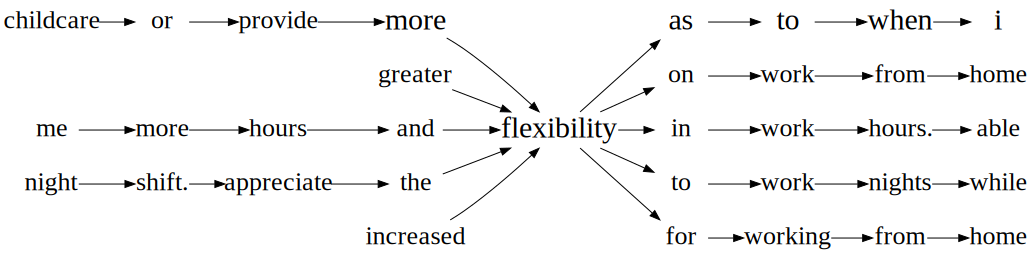

In [193]:
g = wordtree.search_and_draw(corpus = df["Q16"], keyword = "flexibility")
g

  0%|          | 0/263 [00:00<?, ?it/s]

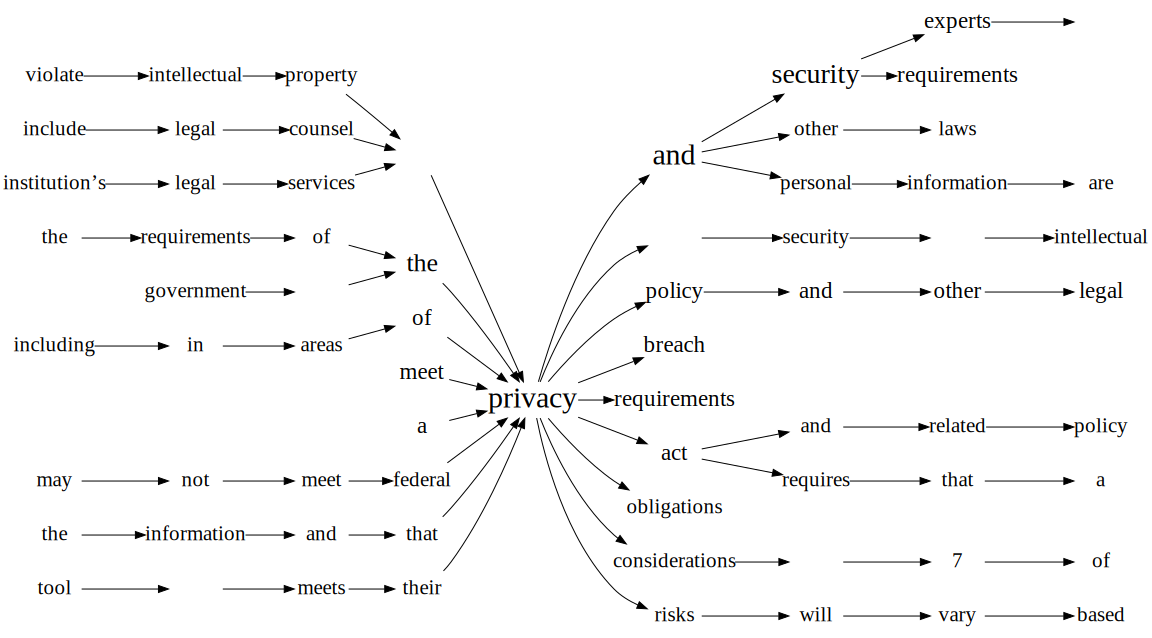

In [194]:
g = wordtree.search_and_draw(corpus = aican_sentence, keyword = "privacy")
g